In [1]:
import matplotlib.pylab as plt
import numpy as np

# define your observational errors

back_temp_error   = 2.0   # K
ob_temp_error     = 0.5   # K
ob_radiance_error = 10.0  # W/m^2

# Define your background temperature
T_background = 280.

# Define an array of observations
T_observations = 280. + 0.5* np.arange(40)

In [2]:
def sblaw(temp):
    sigma = 5.67e-08
    return sigma*temp**4

def H(temp):
    sigma = 5.67e-08
    return 4.0*sigma*temp**3

def temp_ana(t_back, t_ob, error_back, error_ob):
    a1 = error_back**2 / (error_back**2 + error_ob**2)
    a2 = 1.0 - a1
    return t_ob*a1 + t_back*a2

def rad_ana(t_back, t_ob, error_back, error_ob):
    Hlin = H(t_back)
    w    = np.zeros(t_ob.shape)
    ta   = np.zeros(t_ob.shape)
    for n in np.arange(t_ob.shape[0]):
        y     = sblaw(t_ob[n])
        w[n]  = Hlin**2 * error_back**2 / (error_ob**2 + Hlin**2*error_back**2)
        ta[n] = t_back + w[n]*(y - sblaw(t_back))
        #print w[n], y, Hlin, error_ob**2, Hlin**2*error_back**2

    return ta

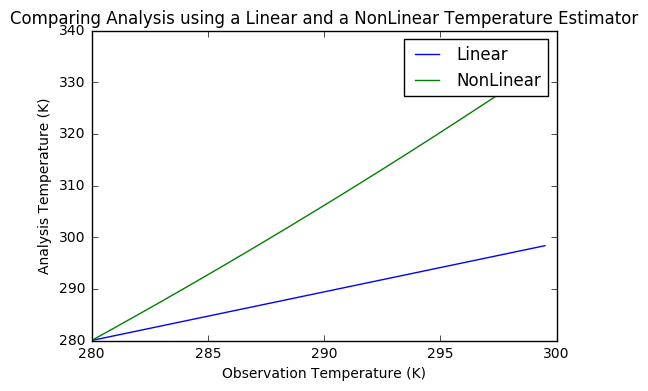

In [3]:
# Compute analysis using series of temperature obs using T_background

T_a = temp_ana(T_background, T_observations, back_temp_error, ob_temp_error)

# Compute analysis using series of radiance observations using T_background

T_ar = rad_ana(T_background, T_observations, back_temp_error, ob_radiance_error)

# Plot results
plt.plot(T_observations, T_a, label="Linear")
plt.plot(T_observations, T_ar, label="NonLinear")
plt.xlabel("Observation Temperature (K)")
plt.ylabel("Analysis Temperature (K)")
plt.title("Comparing Analysis using a Linear and a NonLinear Temperature Estimator")
plt.legend()
plt.show()

